In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


In [2]:
data = pd.read_csv('ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
inp = data.iloc[:,[2,3]].values
out=data.iloc[:,4].values

In [4]:
train_x,test_x,train_y,test_y=train_test_split(inp,out,test_size=0.25,random_state=0)

In [7]:
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x=sc.fit_transform(test_x)
test_x=np.around(test_x,decimals=4)
test_x

array([[-0.5475,  0.5131],
       [ 0.1544, -0.6183],
       [-0.1088,  0.1462],
       [-0.5475,  0.2685],
       [-0.1088, -0.6183],
       [-0.8107, -1.5355],
       [-0.4598, -1.6884],
       [-0.0211,  2.2559],
       [-1.6004, -0.0679],
       [ 0.9441, -0.8323],
       [-0.5475, -0.6488],
       [-0.723 , -0.4654],
       [ 0.0667, -0.4654],
       [ 0.2422,  0.2073],
       [-1.4249,  0.4825],
       [-0.372 ,  1.4304],
       [ 0.0667,  0.2073],
       [-1.5126,  0.4519],
       [ 1.646 ,  1.8279],
       [-0.1088, -1.4744],
       [-0.1088, -0.71  ],
       [ 0.9441,  2.2559],
       [ 0.4176, -0.5877],
       [ 0.9441,  1.0634],
       [-1.1617, -1.2909],
       [ 1.1195,  2.1642],
       [-0.723 ,  0.5131],
       [-0.6352,  0.299 ],
       [ 0.0667, -0.2513],
       [-0.372 ,  0.4825],
       [-1.3371,  0.5436],
       [ 0.0667,  0.2685],
       [ 1.8215, -0.3125],
       [ 0.0667, -0.5265],
       [-1.0739, -0.3736],
       [-1.6004, -0.5571],
       [-1.2494,  0.3296],
 

In [13]:
cf=SVC(kernel='linear',random_state=0)
cf.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
pred_y=cf.predict(test_x)
pred_y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [16]:
test_y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [19]:
cm=confusion_matrix(pred_y,test_y)
cm

array([[63,  7],
       [ 5, 25]])

In [20]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_y,pred_y)
acc

0.88

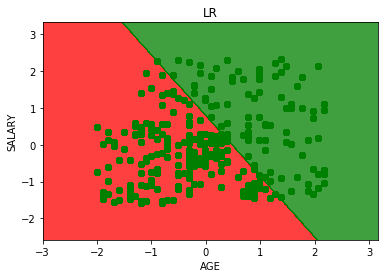

In [21]:
from matplotlib.colors import ListedColormap
x,y = train_x,train_y
x1,x2=np.meshgrid(np.arange(start= x[:,0].min() -1 , stop = x[:,0].max()+1 , step=0.01),
                  np.arange(start= x[:,1].min() -1 , stop = x[:,1].max()+1 , step=0.01))
plt.contourf(x1,x2,cf.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(y):
    plt.scatter(x[y==j,0],x[y==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('LR')
plt.xlabel('AGE')
plt.ylabel("SALARY")
plt.show()

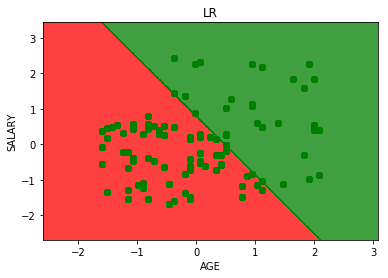

In [22]:
from matplotlib.colors import ListedColormap
x,y = test_x,test_y
x1,x2=np.meshgrid(np.arange(start= x[:,0].min() -1 , stop = x[:,0].max()+1 , step=0.01),
                  np.arange(start= x[:,1].min() -1 , stop = x[:,1].max()+1 , step=0.01))
plt.contourf(x1,x2,cf.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(y):
    plt.scatter(x[y==j,0],x[y==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('LR')
plt.xlabel('AGE')
plt.ylabel("SALARY")
plt.show()